# Librerías

In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm 
from scipy import sparse
import seaborn as sns
from matplotlib import pyplot as plt

# Lectura

In [4]:
parietal00 = pd.read_csv('../data/00-filt_counts/00-filtered_feature_bc_matrix010_parietal_filt_counts.csv').drop('Unnamed: 0', axis = 1)
parietal01 = pd.read_csv('../data/01-filt_counts/01-filtered_feature_bc_matrix010_parietal_filt_counts.csv').drop('Unnamed: 0', axis = 1)

frontal00 = pd.read_csv('../data/00-filt_counts/00-filtered_feature_bc_matrix010_frontal_filt_counts.csv').drop('Unnamed: 0', axis = 1)
frontal01 = pd.read_csv('../data/01-filt_counts/01-filtered_feature_bc_matrix010_frontal_filt_counts.csv').drop('Unnamed: 0', axis = 1)

In [5]:
parietal00 = sparse.csr_matrix(parietal00)
parietal01 = sparse.csr_matrix(parietal01)

frontal00 = sparse.csr_matrix(frontal00)
frontal01 = sparse.csr_matrix(frontal01)

# Histograma de conteos

  0%|          | 0/4 [00:00<?, ?it/s]

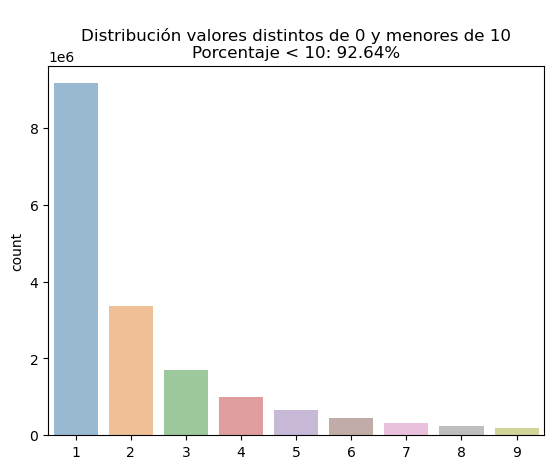

 25%|██▌       | 1/4 [08:14<24:43, 494.35s/it]

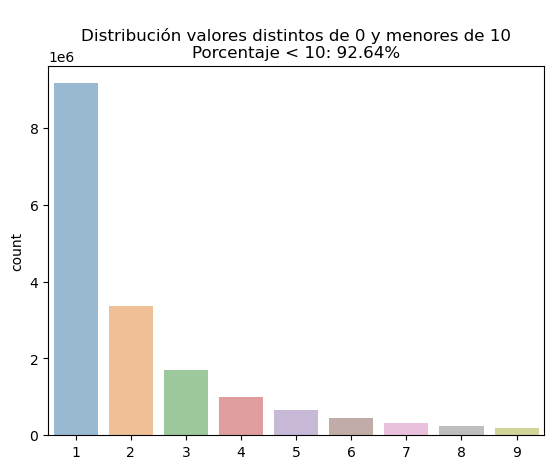

 50%|█████     | 2/4 [13:56<13:29, 404.65s/it]

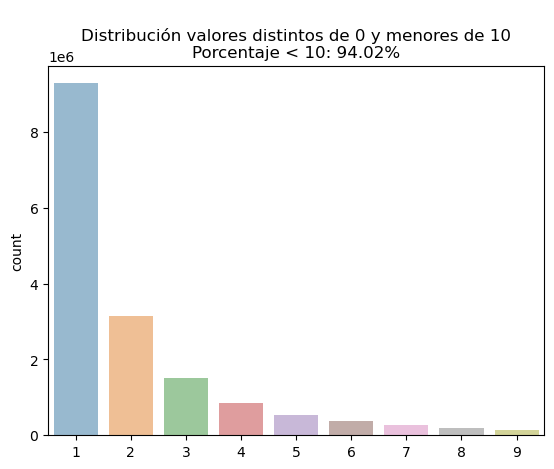

 75%|███████▌  | 3/4 [19:16<06:05, 365.93s/it]

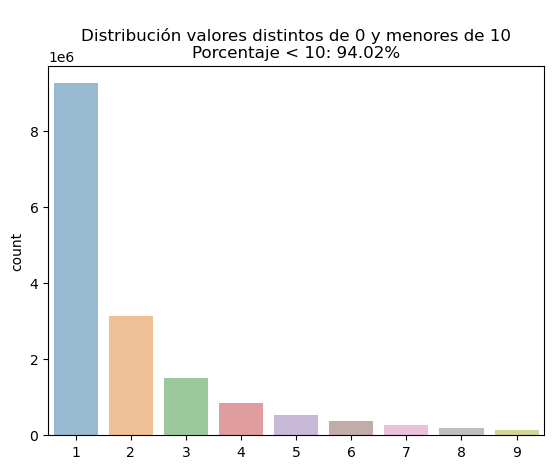

100%|██████████| 4/4 [24:29<00:00, 367.49s/it]


In [8]:
# Histograma conteos
for sparse_mat in tqdm([parietal00, parietal01, frontal00, frontal01]):
    nonzero_values = sparse_mat.nonzero()
    nonzero_values = np.array([sparse_mat[i,j] for (i,j) in zip(nonzero_values[0],nonzero_values[1])])
    
    porcentaje_men_10 = round(len(nonzero_values[nonzero_values<10])/len(nonzero_values)*100,2)

    sns.countplot(x = nonzero_values[nonzero_values<10], alpha = 0.5).set(
        title = f'\nDistribución valores distintos de 0 y menores de 10\nPorcentaje < 10: {porcentaje_men_10}%')
    plt.show()